c:\Users\Nassim\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[{6.0: 6.0, 7.0: 7.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 1.0: 1.0}, {6.0: 0.1675889685611424, 7.0: 0.1671365775024263, 2.0: 0.178926282051282, 3.0: 0.1711199826395071, 4.0: 0.1739921226156114, 5.0: 0.1675861884734974}, {6.0: 4.937361111111111, 7.0: 5.606011904761905, 2.0: 4.575, 3.0: 4.466666666666667, 4.0: 4.791666666666666, 5.0: 4.304583333333333}, {2.0: 2.8, 1.0: 3.15}, {2.0: 2.3, 3.0: 2.1166666666666667, 1.0: 2.6666666666666665}, {2.0: 2.308333333333333, 3.0: 2.0791666666666666, 4.0: 1.775, 1.0: 2.520833333333333}, {2.0: 1.89875, 3.0: 1.7391666666666667, 4.0: 1.5925, 5.0: 1.3216666666666668, 1.0: 2.1041666666666665}, {6.0: 1.3583333333333334, 2.0: 2.0884027777777776, 3.0: 1.9150694444444445, 4.0: 1.7672222222222222, 5.0: 1.5, 1.0: 2.205555555555556}, {6.0: 1.538343253968254, 7.0: 1.431111111111111, 2.0: 2.285386904761905, 3.0: 2.1546626984126984, 4.0: 1.9268948412698408, 5.0: 1.6822420634920634, 1.0: 2.3552876984126985}]


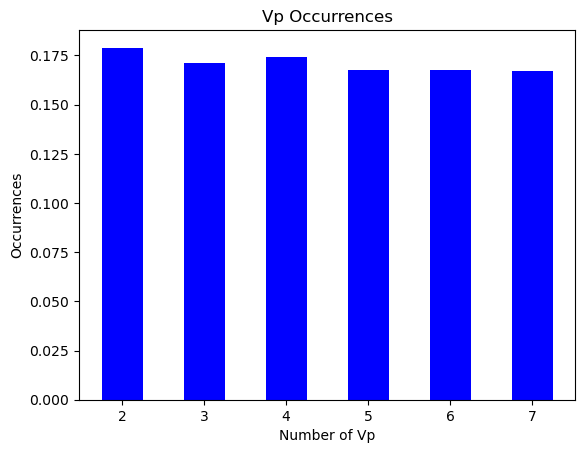

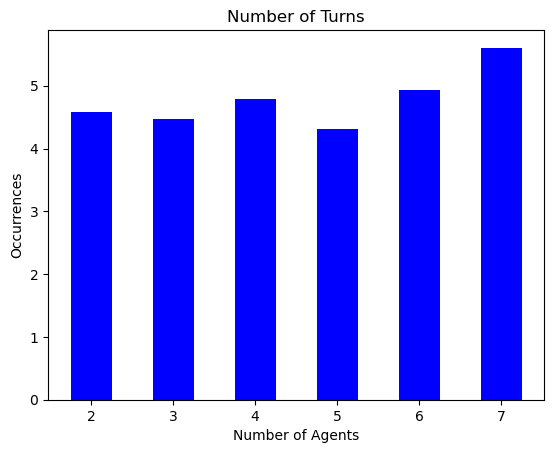

<Figure size 640x480 with 0 Axes>

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
def est(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df

liste_of_df=create_csv_link("csv/csv_UG")

def sommeCSV(liste_of_df):
    lister=[]
    m=0
    for df in liste_of_df :
        
        if(m==0):
            for collone in df :
                lister.append([list(df[collone]),1])
                m=1
                
        else :
            col=0
            for collone in df :
                
                for j in range (len(list(df[collone]))) :
                    
                    if (not np.isnan(df[collone][j])) and lister[col][0][j]!=" nan":
                        lister[col][0][j]=float(lister[col][0][j])+float(df[collone][j])
                              
                lister[col][1]=float(lister[col][1])+1
                col=col+1
   
    new_lister=[]
    
    for i in range(len(lister)):
        semi_list={}
        for j in range(len(lister[i][0])):
            if(est(lister[i][0][j])):
                
                semi_list[float(lister[0][0][j])/lister[0][1]]=(float(lister[i][0][j])/float(lister[i][1]))
        new_lister.append(semi_list)
    
    return new_lister

def affichage_graph_vp(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Vp Occurrences')
    plt.xlabel('Number of Vp')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
def affichage_graph_turn(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Number of Turns')
    plt.xlabel('Number of Agents')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
print(sommeCSV(liste_of_df))
affichage_graph_vp(sommeCSV(liste_of_df)[1])
affichage_graph_turn(sommeCSV(liste_of_df)[2])

0.1675889685611424
0.1671365775024263
0.178926282051282
0.1711199826395071
0.1739921226156114
0.1675861884734974
0


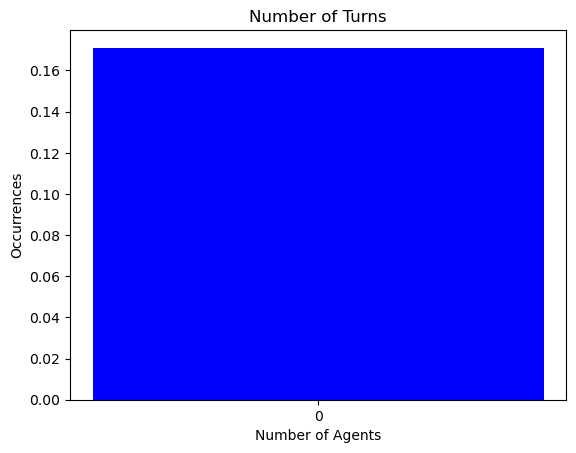

<Figure size 640x480 with 0 Axes>

In [2]:
liste_of_df=create_csv_link("csv/csv_UG")

def mean_global(list_of_df):
    dic={}
    l=0
        
    for df in list_of_df:
        
        somme=0
        for j in df["vp"]:
            if(not np.isnan(j)):
                print(j)
                somme=somme+float(j)
        dic[l]=somme/6
        print(l)
        l=l+1
    return dic 

affichage_graph_turn(mean_global(liste_of_df))


[['True', '1', '24', '-0.022609043617446978]'], ['True', '1', '8', '0.015151515151515166]'], ['True', '1', '19', '0.013784461152882233]'], ['True', '1', '9', '-0.008771929824561375]'], ['True', '0', '21', '-0.008771929824561375]'], ['True', '1', '32', '-0.031226486079759225]'], ['True', '1', '5', '0.033333333333333354]'], ['True', '1', '30', '0.017100561510975]'], ['True', '1', '10', '0.047619047619047644]'], ['True', '1', '12', '-0.016666666666666663]'], ['True', '1', '39', '-0.027777777777777762]'], ['True', '0', '5', '0.033333333333333354]'], ['True', '0', '41', '-0.04061624649859946]'], ['True', '1', '9', '0.011730205278592393]'], ['True', '1', '14', '0.018181818181818188]'], ['False', '1', '5', '0.1515151515151515]'], ['True', '1', '24', '-0.03980634749865519]'], ['True', '1', '17', '-0.014220416455053342]'], ['True', '0', '14', '0.027605901951451656]'], ['True', '1', '36', '-0.04163126593033137]'], ['True', '1', '31', '-0.0329299183788348]'], ['False', '4', '8', '0.15686274509803

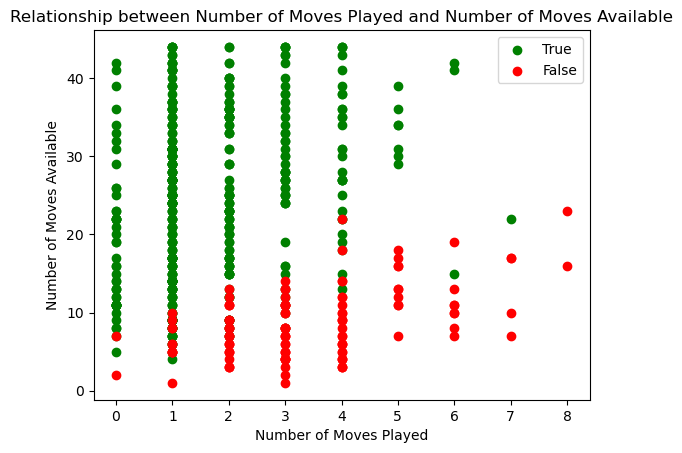

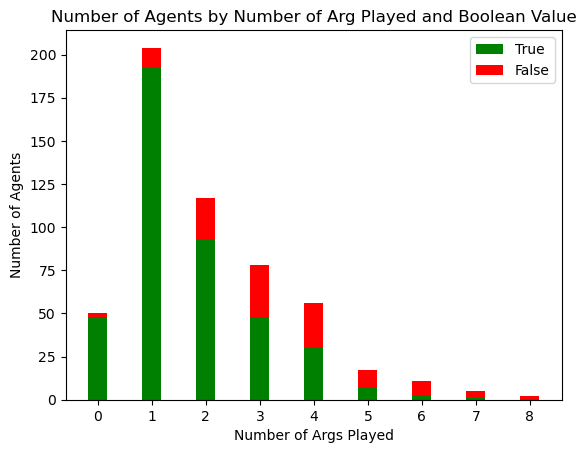

In [3]:
def plot_agents_bar_chart(data):
    # Création d'un dictionnaire pour stocker le nombre d'agents par nombre de coups et valeur boolean
    agent_counts = {}

    for item in data:
        # Récupération du nombre de coups et de la valeur boolean
        coup = int(item[1].strip())
        boolean = item[0]

        # Mise à jour du dictionnaire
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    # Préparation des données pour le graphique
    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    # Création du diagramme en barres
    width = 0.35  # Largeur des barres
    fig, ax = plt.subplots()
    ind = np.arange(len(coups))  # Emplacement des barres

    p1 = ax.bar(ind, true_counts, width, color='green', label='True')
    p2 = ax.bar(ind, false_counts, width, color='red', bottom=true_counts, label='False')

    ax.set_xlabel('Number of Args Played')
    ax.set_ylabel("Number of Agents")
    ax.set_title('Number of Agents by Number of Arg Played and Boolean Value')
    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    plt.show()


# Chemin vers le fichier texte où sont enregistrées les données
file_path = "csv/csv_UG_point"

def file_transform(file_path):
    # Lecture des données depuis le fichier texte et stockage dans une liste
   
    liste_of_data=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(file_path):
        with open(file_path+"/"+element, "r") as file:
            lines = file.readlines()
        retrieved_data = [line.strip().split() for line in lines]
        for i in retrieved_data :
            liste_of_data.append(i)
            
    return liste_of_data
            
    


data=file_transform(file_path)
print(data)
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Number of Moves Played')
plt.ylabel('Number of Moves Available')

# Afficher le graphique
plt.title('Relationship between Number of Moves Played and Number of Moves Available')
plt.show()

plot_agents_bar_chart(data)



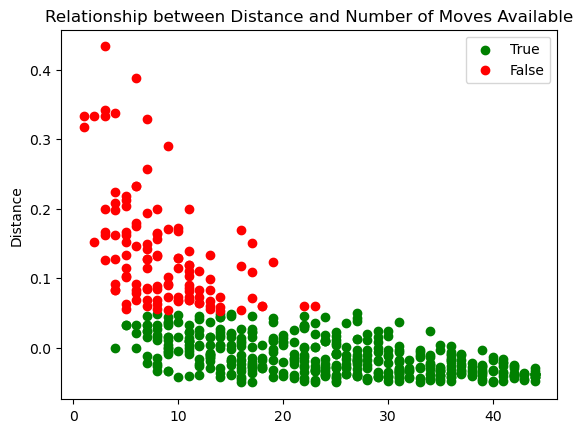

In [4]:
# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[2].strip(), d[3].strip().split("]")[0]] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.ylabel('Number of Moves Available')
plt.ylabel('Distance')

# Afficher le graphique
plt.title('Relationship between Distance and Number of Moves Available')
plt.show()


[{6.0: 6.0, 7.0: 7.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 1.0: 1.0}, {6.0: 0.1675889685611424, 7.0: 0.1671365775024263, 2.0: 0.178926282051282, 3.0: 0.1711199826395071, 4.0: 0.1739921226156114, 5.0: 0.1675861884734974}, {6.0: 4.937361111111111, 7.0: 5.606011904761905, 2.0: 4.575, 3.0: 4.466666666666667, 4.0: 4.791666666666666, 5.0: 4.304583333333333}, {2.0: 2.8, 1.0: 3.15}, {2.0: 2.3, 3.0: 2.1166666666666667, 1.0: 2.6666666666666665}, {2.0: 2.308333333333333, 3.0: 2.0791666666666666, 4.0: 1.775, 1.0: 2.520833333333333}, {2.0: 1.89875, 3.0: 1.7391666666666667, 4.0: 1.5925, 5.0: 1.3216666666666668, 1.0: 2.1041666666666665}, {6.0: 1.3583333333333334, 2.0: 2.0884027777777776, 3.0: 1.9150694444444445, 4.0: 1.7672222222222222, 5.0: 1.5, 1.0: 2.205555555555556}, {6.0: 1.538343253968254, 7.0: 1.431111111111111, 2.0: 2.285386904761905, 3.0: 2.1546626984126984, 4.0: 1.9268948412698408, 5.0: 1.6822420634920634, 1.0: 2.3552876984126985}]


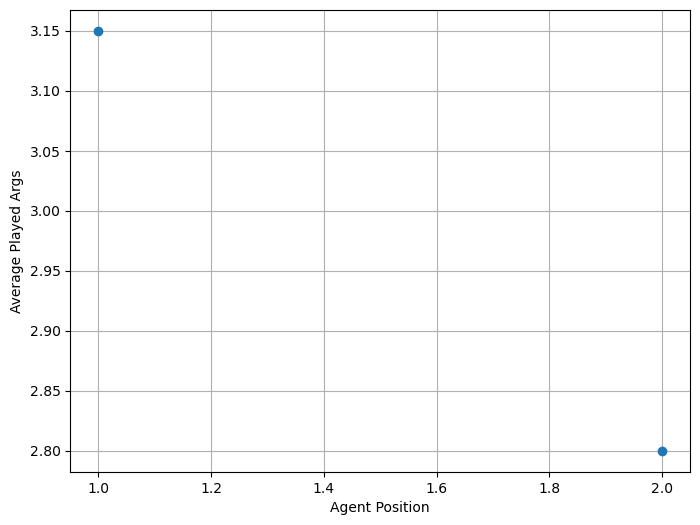

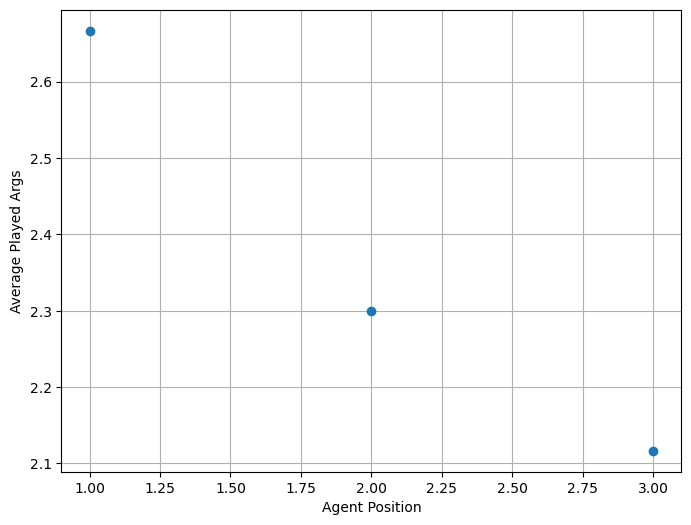

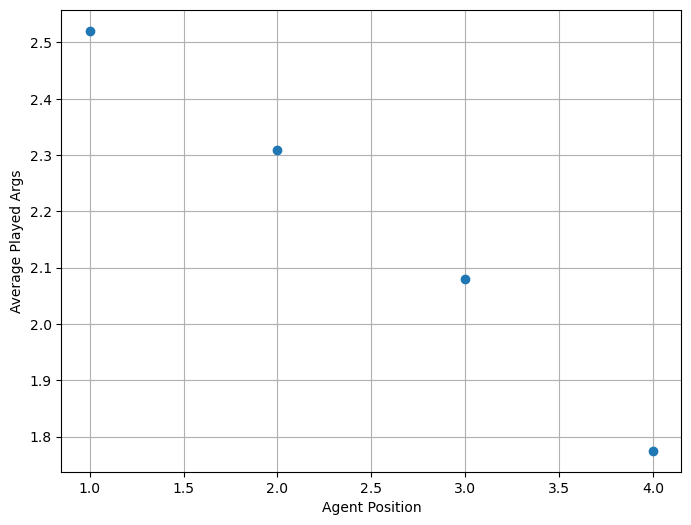

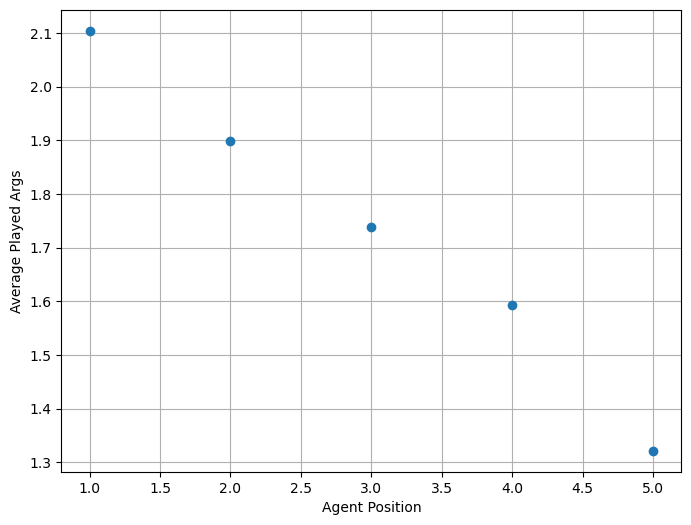

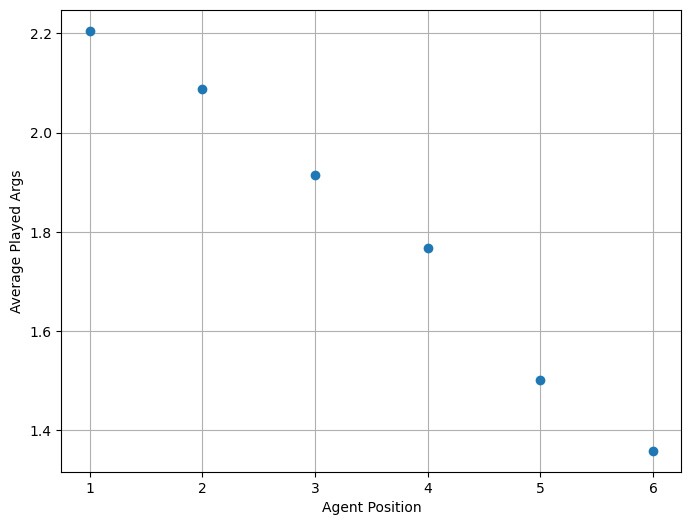

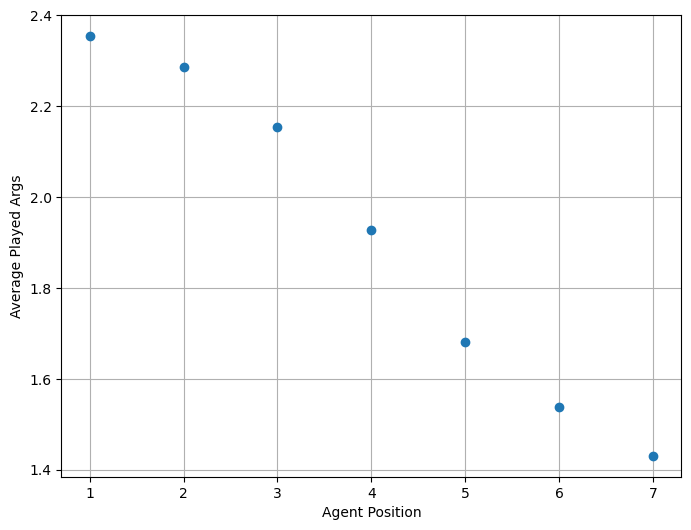

In [5]:
def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('Agent Position')
    plt.ylabel('Average Played Args')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()

print(sommeCSV(liste_of_df))
for i in range(3,9):
    afficher_graphique(sommeCSV(liste_of_df)[i])